#model notebook

in this we will extract the data and fit into our model and evaluate the results and optimize it hehe

In [1]:
import tensorflow as tf
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Dense, MaxPool2D, Conv2D
from tensorflow.keras.layers import Input, Activation, Add
from tensorflow.keras.models import Model
from keras.layers import MaxPooling2D
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, Adagrad, Adadelta, Adamax, RMSprop


extract data

In [2]:
fldr="dataset/UTKFace"

In [3]:
import os
fils=os.listdir(fldr)

create list of images

In [4]:
ages=[]
genders=[]
images=[]

for fle in fils:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)
    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

dataset/UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
dataset/UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
dataset/UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
dataset/UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
dataset/UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
dataset/UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
dataset/UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
dataset/UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
dataset/UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
dataset/UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
dataset/UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
dataset/UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
dataset/UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
dataset/UT

create list of age and gender in array

In [5]:
for fle in fils:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

100 0


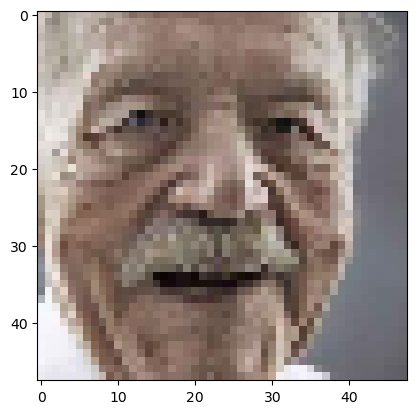

In [6]:
plt.imshow(images[0])
print(ages[0] , genders[0])

In [7]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [8]:
np.save(fldr+'images.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [9]:
values , counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


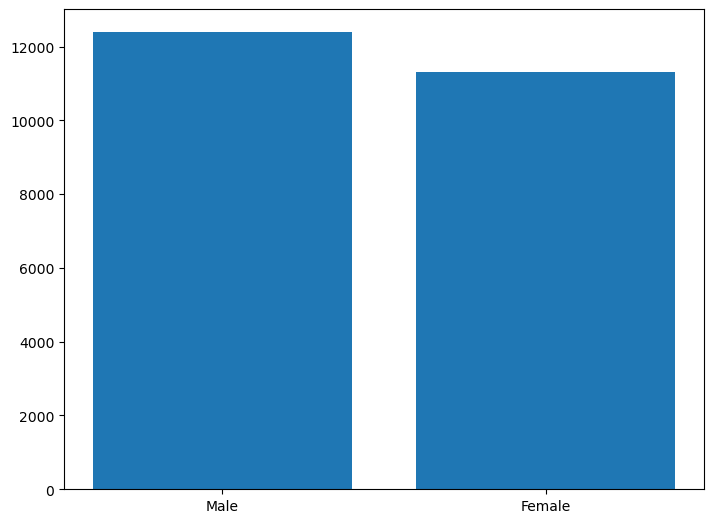

In [10]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male' , 'Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()


In [11]:
values , counts = np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [12]:
val=values.tolist()
cnt=counts.tolist()

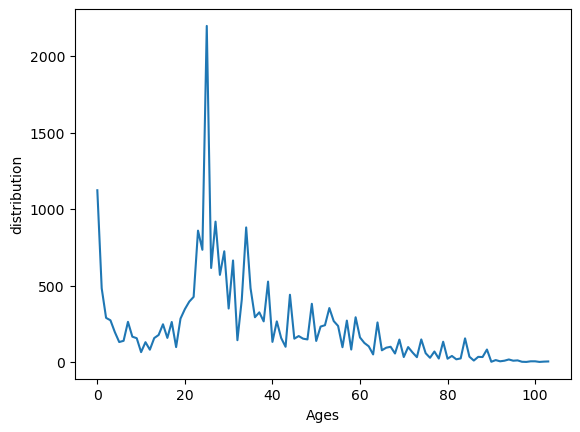

In [13]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('distribution')
plt.show()

In [14]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [15]:
images_f_2=images_f/255
labels_f=np.array(labels)
images_f_2.shape

(23708, 48, 48, 3)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [18]:
y_train[0:5]

array([[ 1,  0],
       [20,  1],
       [55,  1],
       [50,  0],
       [31,  1]])

In [19]:
y_train_2=[y_train[:,1],y_train[:,0]]
y_test_2=[y_test[:,1],y_test[:,0]]

In [20]:
def Convolution(input_tensor, filters):
  x = Conv2D(filters=filters, kernel_size=(3, 3), padding="same", strides=(1, 1),
             kernel_regularizer=l2(0.001))(input_tensor)  # Use l2 for regularization
  x = Dropout(0.1)(x)
  x = Activation('relu')(x)
  return x


In [21]:
def model(input_shape):
    inputs = Input(shape=input_shape)
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    conv_5=Convolution(maxp_4,512)
    maxp_5=MaxPooling2D(pool_size=(2,2))(conv_5)
    flatten=Flatten()(maxp_5)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1 = Dense(1, activation='sigmoid', name='sex_out')(drop_1)
    output_2 = Dense(1, activation='relu', name='age_out')(drop_2)
    model = Model(inputs=inputs, outputs=[output_1, output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam", metrics=[['accuracy'], ['mae']])
    return model

In [22]:
model_instances=model((48,48,3))
model_instances

<Functional name=functional, built=True>

In [23]:
model_instances.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)      │ (None, 48, 48, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d (Conv2D)               │ (None, 48, 48, 32)        │             896 │ input_layer[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout (Dropout)             │ (None, 48, 48, 32)        │               0 │ conv2d[0][0]               │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation (Activation)       │ (None, 48, 48, 32)        │               0 │ dropout[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d (MaxPooling2D)  │ (None, 24, 24, 32)        │               0 │ activation[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_1 (Conv2D)             │ (None, 24, 24, 64)        │          18,496 │ max_pooling2d[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_1 (Dropout)           │ (None, 24, 24, 64)        │               0 │ conv2d_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_1 (Activation)     │ (None, 24, 24, 64)        │               0 │ dropout_1[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_1               │ (None, 12, 12, 64)        │               0 │ activation_1[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_2 (Conv2D)             │ (None, 12, 12, 128)       │          73,856 │ max_pooling2d_1[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_2 (Dropout)           │ (None, 12, 12, 128)       │               0 │ conv2d_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_2 (Activation)     │ (None, 12, 12, 128)       │               0 │ dropout_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ max_pooling2d_2               │ (None, 6, 6, 128)         │               0 │ activation_2[0][0]         │
│ (MaxPooling2D)                │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2d_3 (Conv2D)             │ (None, 6, 6, 256)         │         295,168 │ max_pooling2d_2[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_3 (Dropout)           │ (None, 6, 6, 256)         │               0 │ conv2d_3[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ activation_3 (Activation)     │ (None, 6, 6, 256)         │               0 │ dropout_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 1,634,370 (6.23 MB)

 Trainable params: 1,634,370 (6.23 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [25]:
fle_s='age_gen_detection.keras'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=50,monitor='val_loss',restore_best_weights=True)
callback_list=[checkpoint,Early_stop]

In [26]:
History = model_instances.fit(x_train, y_train_2, batch_size=64, validation_data=(x_test, y_test_2), epochs=250, callbacks=callback_list)

Epoch 1/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - age_out_mae: 18.3570 - loss: 19.4738 - sex_out_accuracy: 0.5116
Epoch 1: val_loss improved from inf to 18.26552, saving model to age_gen_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 68s 218ms/step - age_out_mae: 18.3505 - loss: 19.4669 - sex_out_accuracy: 0.5116 - val_age_out_mae: 17.3235 - val_loss: 18.2655 - val_sex_out_accuracy: 0.5294
Epoch 2/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - age_out_mae: 14.8755 - loss: 15.8119 - sex_out_accuracy: 0.5167
Epoch 2: val_loss improved from 18.26552 to 16.40220, saving model to age_gen_detection.keras
278/278 ━━━━━━━━━━━━━━━━━━━━ 60s 217ms/step - age_out_mae: 14.8741 - loss: 15.8104 - sex_out_accuracy: 0.5168 - val_age_out_mae: 15.4703 - val_loss: 16.4022 - val_sex_out_accuracy: 0.6023
Epoch 3/250
278/278 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step - age_out_mae: 12.3044 - loss: 13.2315 - sex_out_accuracy: 0.6260
Epoch 3: val_loss improved from 16.40220 to 15.72857, saving model to age_gen_

In [28]:
model_instances.evaluate(x_test,y_test_2)

186/186 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - age_out_mae: 6.5560 - loss: 7.5115 - sex_out_accuracy: 0.8743


[7.390276908874512, 6.441621780395508, 0.8810527920722961]

In [29]:
pred=model_instances.predict(x_test)

186/186 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step


In [30]:
pred[1]

array([[50.662266],
       [21.472706],
       [39.460934],
       ...,
       [32.178406],
       [29.316196],
       [11.072971]], dtype=float32)

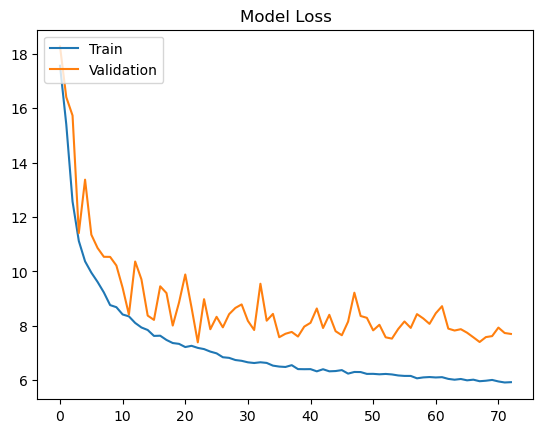

In [33]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train' , 'Validation'] , loc='upper left')
plt.savefig("model_Loss.png")
# plt_subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)


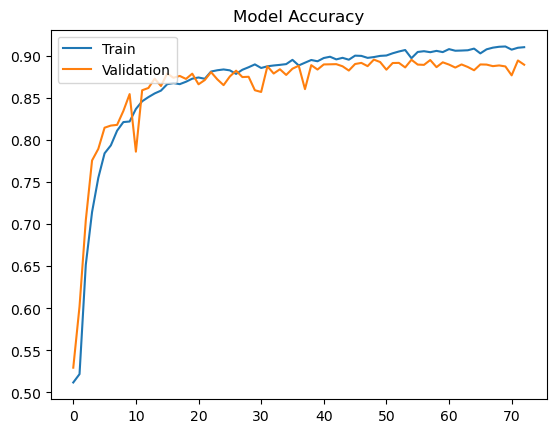

In [35]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train' , 'Validation'] , loc='upper left')
# plt_subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)
plt.savefig("model_Accuracy.png")

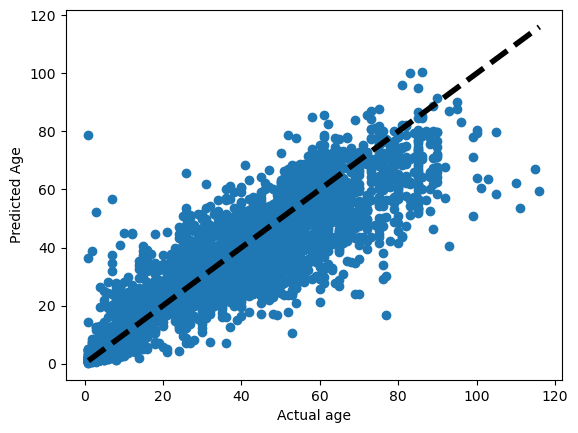

In [36]:
fig , ax =plt.subplots()
ax.scatter(y_test_2[1] , pred[1])
ax.plot([y_test_2[1].min(),y_test_2[1].max()],[y_test_2[1].min(),y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual age')
ax.set_ylabel('Predicted Age')
plt.savefig("actualAge_PredictedAge.png")
plt.show()

In [37]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

C:\Users\eradn\AppData\Local\Temp\ipykernel_8816\4197083195.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Pred_l.append(int(np.round(pred[0][i])))


In [41]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
report=classification_report(y_test_2[0] , Pred_l)

In [58]:
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3138
           1       0.88      0.87      0.87      2789

    accuracy                           0.88      5927
   macro avg       0.88      0.88      0.88      5927
weighted avg       0.88      0.88      0.88      5927



<Axes: >

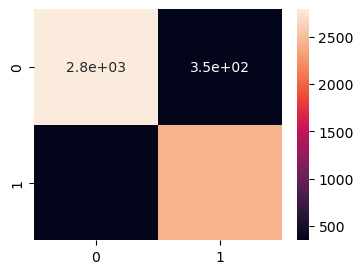

In [62]:
results=confusion_matrix(y_test_2[0] , Pred_l)
import seaborn as sns
plt.figure(figsize=(4, 3)) 
sns.heatmap(results, annot=True)

In [103]:
def test_image(ind , images_f , images_f_2 , Model):
    plt.imshow(images_f[ind])
    plt.title("Image")
    plt.show()
    image_test=images_f_2[ind]
    pred_1=model_instances.predict(np.array([image_test]))
    sex_f=['Male' , 'Female']
    age=int(np.round(pred_1[1][0][0]))
    sex=int(np.round(pred_1[0][0][0]))
    print("Predicted Age is: " + str(age))
    print("Predicted Gender is: " + sex_f[sex])
    print()

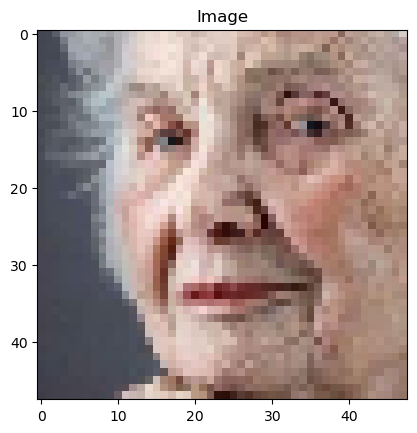

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicted Age is: 81
Predicted Gender is: Female



In [104]:
test_image(4, images_f , images_f_2 , Model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


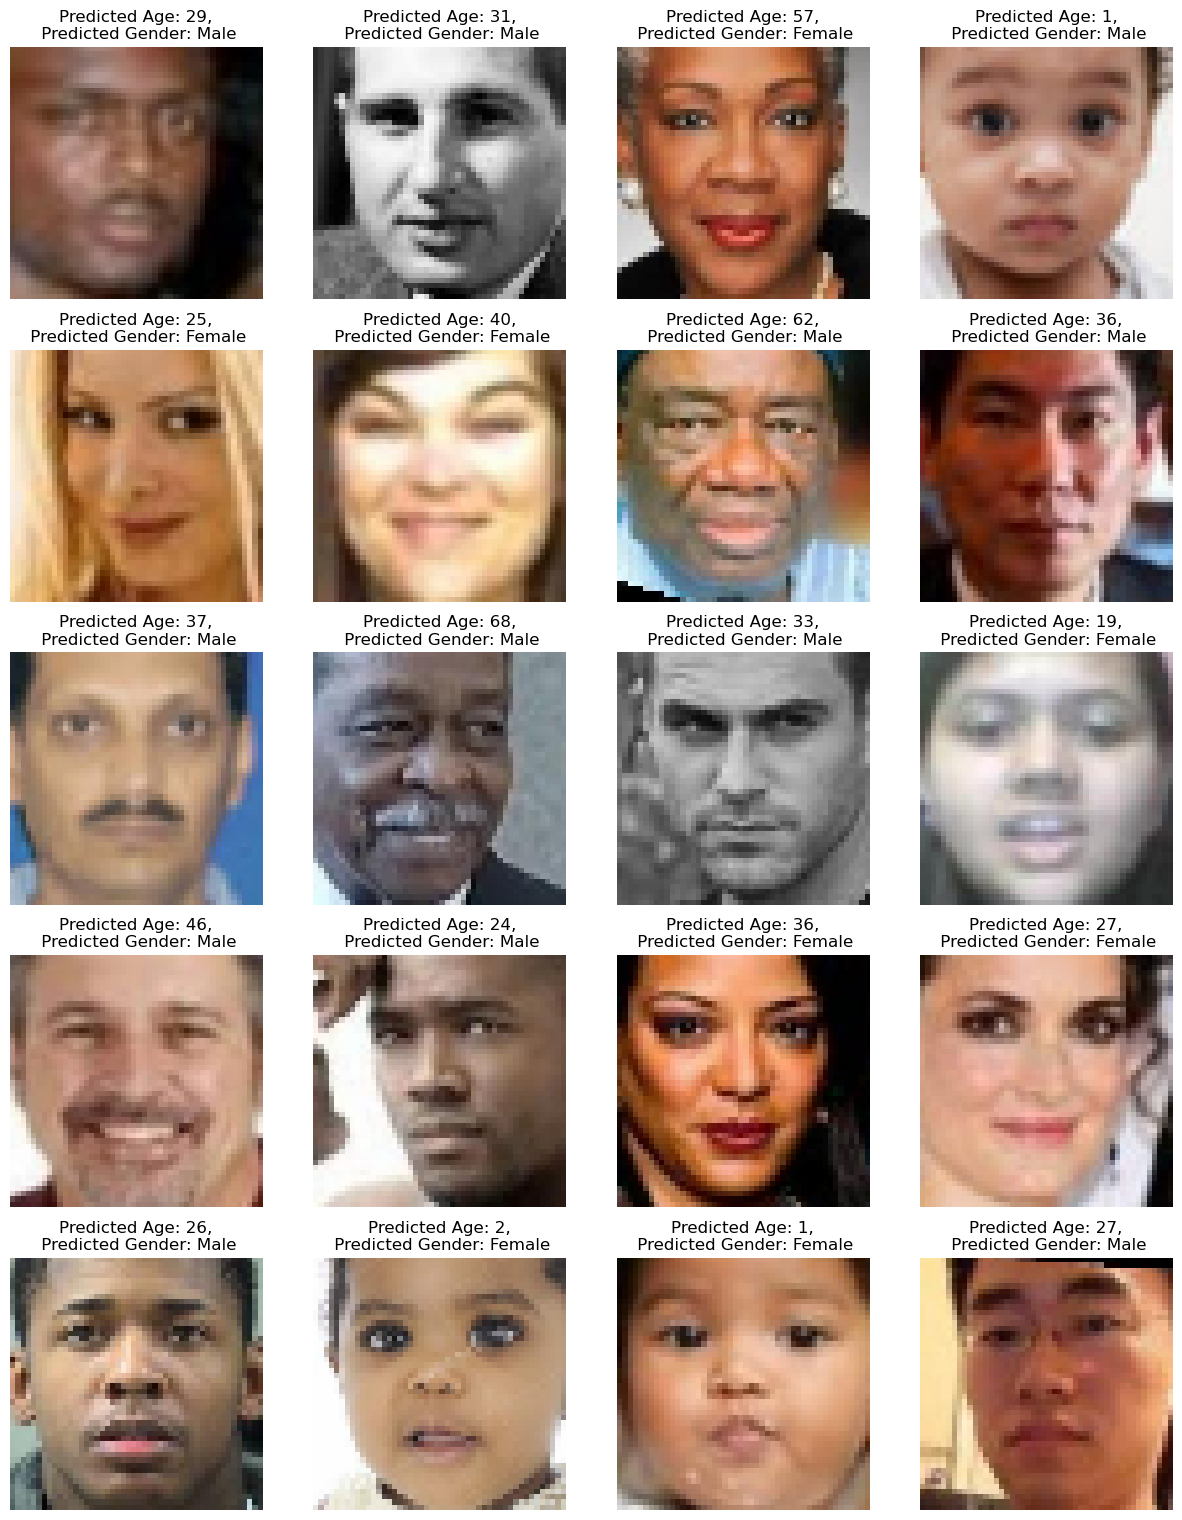

In [132]:
indices = np.random.choice(len(images_f), 20, replace=False)
fig, axs = plt.subplots(5, 4, figsize=(15,19))

# loop through the indices and plot each image with its prediction
for i, ax in enumerate(axs.flat):
    ind = indices[i]
    image = images_f[ind]
    image_test = images_f_2[ind]
    pred_1 = model_instances.predict(np.array([image_test]))
    sex_f = ['Male', 'Female']
    age = int(np.round(pred_1[1][0][0]))
    sex = int(np.round(pred_1[0][0][0]))
    ax.imshow(image)
    ax.set_title(f"Predicted Age: {age},\n Predicted Gender: {sex_f[sex]}")
    ax.axis('off') 

plt.savefig("prediction_chart.png")
plt.show()